# Chapter 7 - Exercise 3: Bank

## Sử dụng tập dữ liệu bank.csv chứa thông tin liên quan đến các chiến dịch tiếp thị trực tiếp - the direct marketing campaigns (dựa trên các cuộc gọi điện thoại) của một tổ chức ngân hàng Bồ Đào Nha. 

## Thông thường, cần có nhiều contact cho cùng một khách hàng, để truy cập xem liệu có sản phẩm (tiền gửi ngân hàng có kỳ hạn - bank term deposit) sẽ được đăng ký (yes) hay không (no). 

## Tập dữ liệu chứa một số thông tin khách hàng (như age, job...) và thông tin liên quan đến chiến dịch (chẳng hạn như contact hoặc communication type, day, month và duration của contact...).

## Đối với chiến dịch tiếp thị tiếp theo, công ty muốn sử dụng dữ liệu này và chỉ liên hệ với những khách hàng tiềm năng sẽ đăng ký tiền gửi có kỳ hạn, do đó giảm bớt nỗ lực cần thiết để liên hệ với những khách hàng không quan tâm. Để làm được điều này, cần tạo một mô hình có thể dự đoán liệu khách hàng có đăng ký tiền gửi có kỳ hạn hay không (y).

## Yêu cầu:
+ Đọc dữ liệu, tìm hiểu sơ bộ về dữ liệu. Chuẩn hóa dữ liệu nếu cần
+ Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
+ Áp dụng Random Forest, Tìm kết quả.
+ Kiểm tra độ chính xác
+ Đánh giá mô hình.
+ Ghi mô hình nếu mô hình phù hợp

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('future.no_silent_downcasting', True)

In [20]:
bank = pd.read_csv('Data/bank.csv', sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4330,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4331,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4332,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [22]:
bank['month'] = bank['month'].replace(bank['month'].unique(), [10, 5, 4, 6, 2, 8, 1, 7, 11, 9, 3, 12])
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33,services,married,secondary,no,-333,yes,no,cellular,30,7,329,5,-1,0,unknown,no
4330,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,5,153,1,-1,0,unknown,no
4331,57,technician,married,secondary,no,295,no,no,cellular,19,8,151,11,-1,0,unknown,no
4332,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,2,129,4,211,3,other,no


In [25]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4334 non-null   int64 
 1   job        4334 non-null   object
 2   marital    4334 non-null   object
 3   education  4334 non-null   object
 4   default    4334 non-null   object
 5   balance    4334 non-null   int64 
 6   housing    4334 non-null   object
 7   loan       4334 non-null   object
 8   contact    4334 non-null   object
 9   day        4334 non-null   int64 
 10  month      4334 non-null   object
 11  duration   4334 non-null   int64 
 12  campaign   4334 non-null   int64 
 13  pdays      4334 non-null   int64 
 14  previous   4334 non-null   int64 
 15  poutcome   4334 non-null   object
 16  y          4334 non-null   object
dtypes: int64(7), object(10)
memory usage: 575.7+ KB


In [27]:
bank['y'].value_counts()

y
no     3832
yes     502
Name: count, dtype: int64

## <span style='color:yellow'> Build RandomForestClassifier

Accuracy on train set: 0.9297725024727992
Accuracy on test  set: 0.8777863182167563


Confusion matrix:
        no  yes
no   1091   51
yes   108   51


Classification report:
               precision    recall  f1-score   support

          no       0.91      0.96      0.93      1142
         yes       0.50      0.32      0.39       159

    accuracy                           0.88      1301
   macro avg       0.70      0.64      0.66      1301
weighted avg       0.86      0.88      0.87      1301



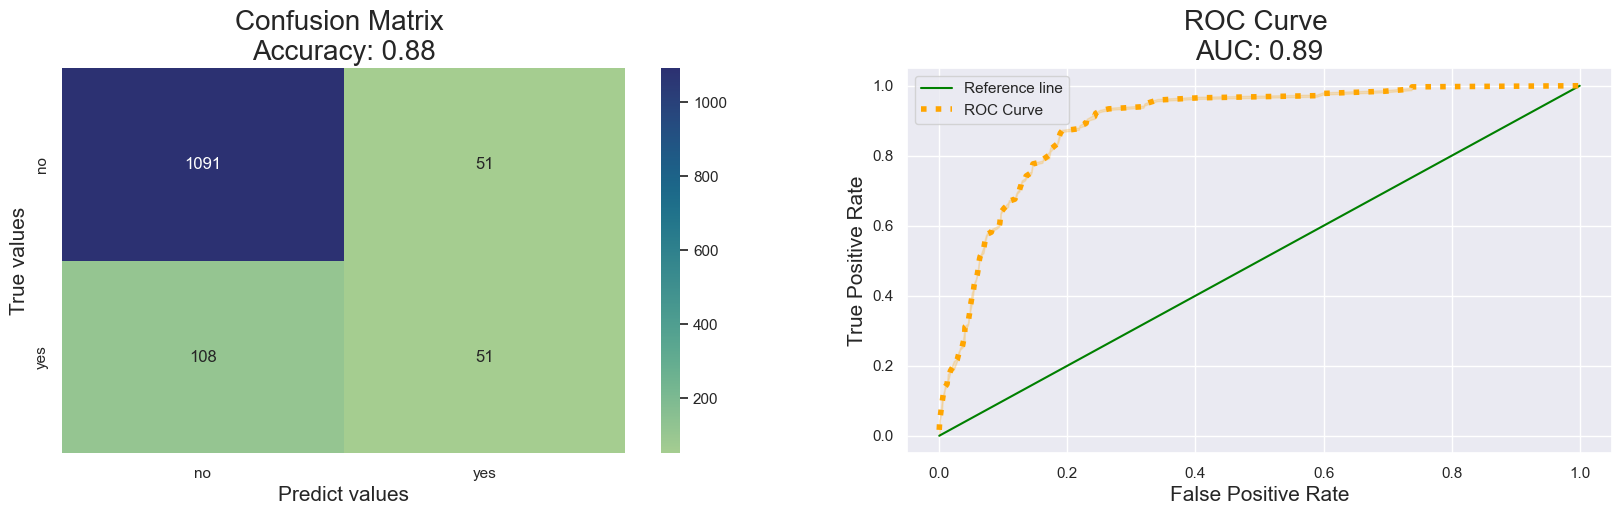

In [36]:
x = bank.drop('y', axis=1)
y = bank['y']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#########################

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

forestC_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer((OneHotEncoder(handle_unknown='ignore', drop='first'), x.select_dtypes('object').columns), remainder='passthrough')),
    ('SMOTE_oversample', SMOTE(random_state=1)),
    ('Forest_Classifier', RandomForestClassifier(min_samples_split = 80, random_state=1) )
])

forestC_pipe.fit(x_train, y_train)

y_test_pred = forestC_pipe.predict(x_test)
y_test_proba = forestC_pipe.predict_proba(x_test)

print(f'Accuracy on train set: {forestC_pipe.score(x_train, y_train)}')
print(f'Accuracy on test  set: {forestC_pipe.score(x_test, y_test)}')
print()

labels = ['no', 'yes']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='yes')

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {forestC_pipe.score(x_test, y_test):.2f}', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title(f'ROC Curve \nAUC: {auc(fpr, tpr):.2f}', size=20)
plt.show()